In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from HiPart.clustering import DePDDP
from HiPart.visualizations import dendrogram_visualization
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("bank_notes.csv")
TARGET = "Target"
df

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.isna().sum().sum() + df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

24

In [5]:
def get_X_y(df):
    return df.drop(columns=[TARGET]), df[TARGET]

In [6]:
def preprocess(df):
    df = df.copy(deep=True)

    # Dropping duplicates that we checked for
    df.drop_duplicates(inplace=True)
    
    # Normalization
    X, y = get_X_y(df)
    df = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)
    df[TARGET] = y

    return df

def pca_transform_df(df, pca: PCA):
    df = df.copy(deep=True)

    X, y = get_X_y(df)
    transformed_X = pca.transform(X)

    df = pd.DataFrame(transformed_X, columns=["PC1", "PC2"], index=X.index)
    df[TARGET] = y

    return df

In [7]:
df = preprocess(df)
pca = PCA(n_components=2, random_state=42).fit(get_X_y(df)[0])
df = pca_transform_df(df, pca)

In [8]:
X, y = get_X_y(df)
NO_OF_CLUSTERS = len(y.unique())

In [9]:
depddp = DePDDP(max_clusters_number=NO_OF_CLUSTERS).fit(X.values)
y_pred = depddp.labels_

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.76       738
           1       0.91      0.29      0.44       610

    accuracy                           0.67      1348
   macro avg       0.77      0.63      0.60      1348
weighted avg       0.76      0.67      0.62      1348



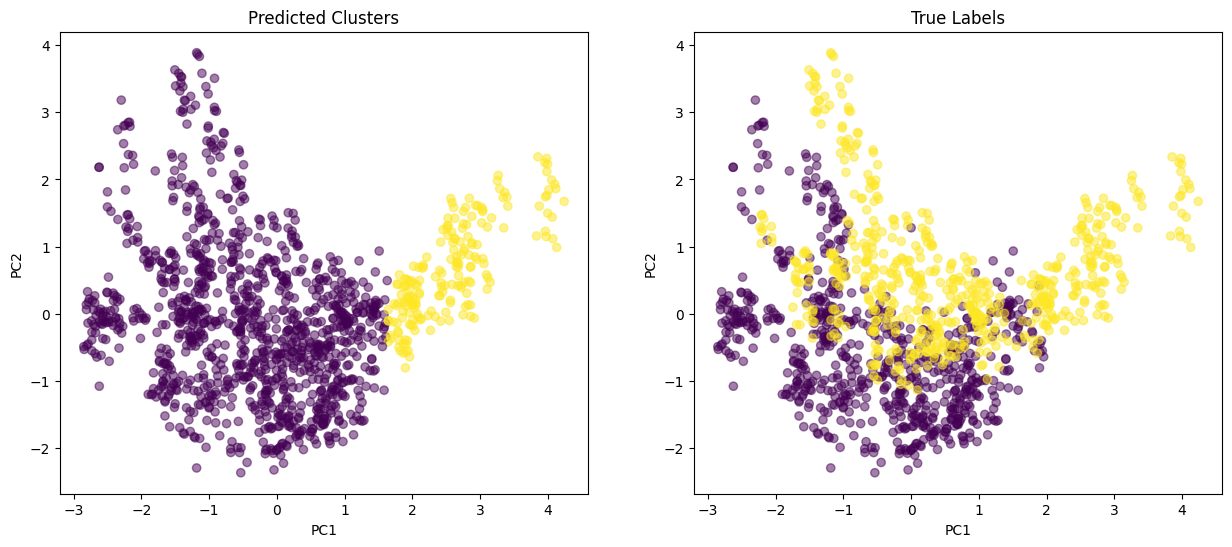

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot the predicted clusters
ax[0].scatter(X["PC1"], X["PC2"], c=y_pred, cmap='viridis', alpha=0.5)
ax[0].set_title('Predicted Clusters')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

# Plot the true labels
ax[1].scatter(X["PC1"], X["PC2"], c=y, cmap='viridis', alpha=0.5)
ax[1].set_title('True Labels')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()

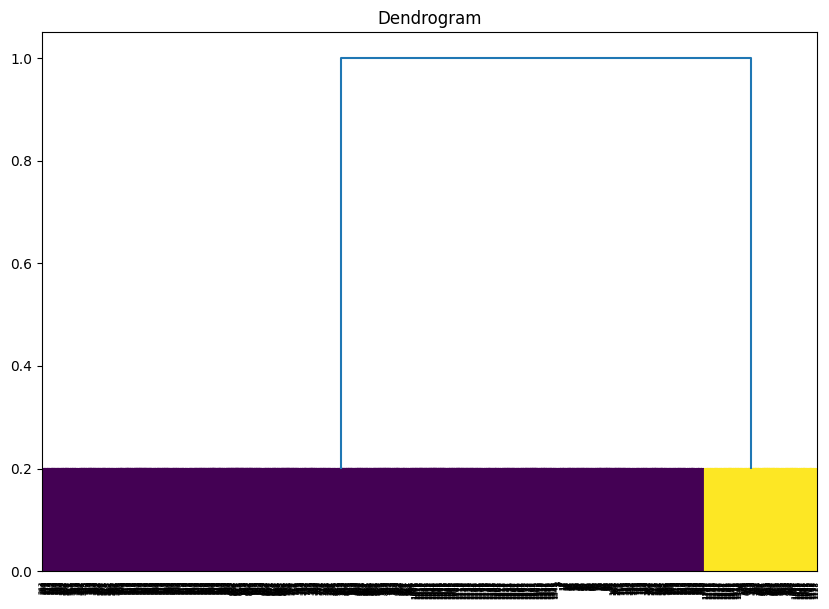

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram_visualization(depddp)
plt.show()

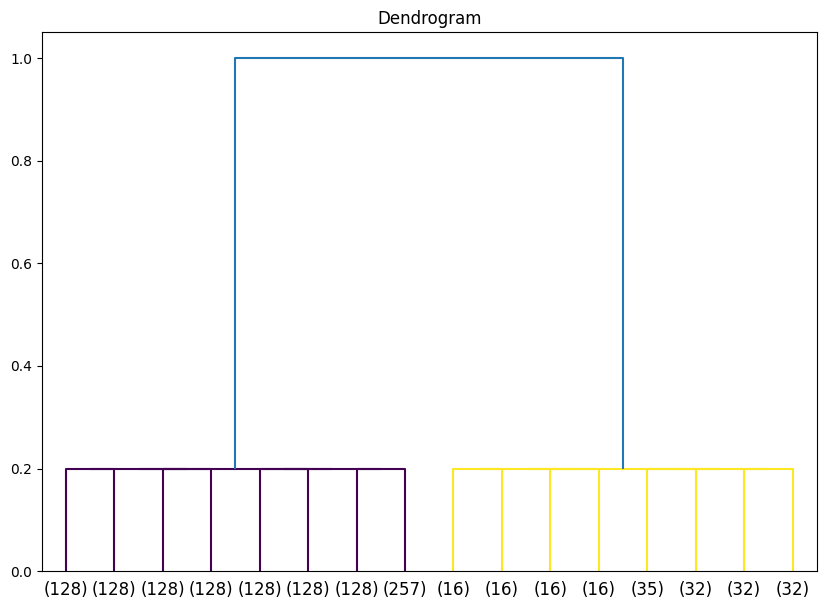

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram_visualization(depddp,truncate_mode="level", p=3)
plt.show()